In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


# Checking for Null Values

In [5]:
# for null column
null_counts = df.isnull().sum()
# Filter columns with more than one null value
columns_with_nulls = null_counts[null_counts >= 1]
columns_with_nulls

Series([], dtype: int64)

In [6]:
# Removing Email no. column since it is unncessary

x = df.iloc[:,1:3001]
x.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# Output Class

y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [8]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2 ,random_state=12)

In [9]:
x_test

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4075,2,1,3,0,1,2,13,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4835,10,7,3,8,3,5,99,0,0,14,...,0,0,0,0,1,0,0,0,6,0
4439,6,5,4,2,0,9,57,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3910,4,5,5,1,3,2,44,0,2,5,...,0,0,0,0,0,0,0,0,0,0
2398,0,1,1,0,4,0,14,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18,11,16,7,5,3,126,1,14,29,...,0,0,0,0,0,0,0,0,0,0
2513,0,4,1,2,0,0,27,0,1,6,...,0,0,0,0,0,0,0,0,0,0
1662,2,4,2,3,1,1,104,0,0,18,...,0,0,0,0,1,0,0,0,3,0
3810,7,2,1,2,1,1,26,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Feature Scaling  

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# K-Nearest Neighbour

In [12]:
#Fitting K-NN classifier to the training set  

from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(x_train, y_train) 

KNeighborsClassifier()

In [13]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [14]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[586, 113],
       [ 24, 312]], dtype=int64)

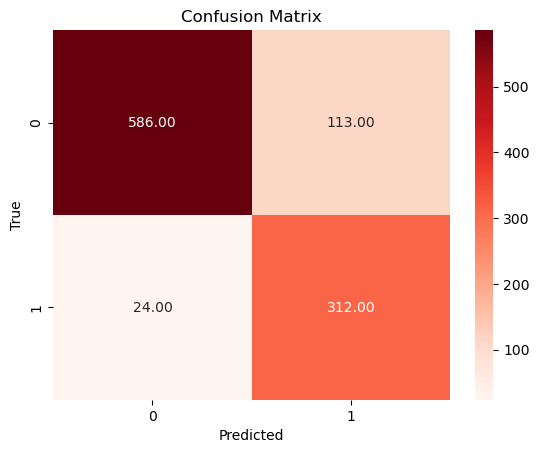

In [15]:
# Confusion matrix graph using seaborn

sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
accuracy_score(y_test, y_pred_knn)

0.8676328502415459

In [17]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 0.7341176470588235
Recall: 0.9285714285714286


F1 Score: 0.8199737187910644


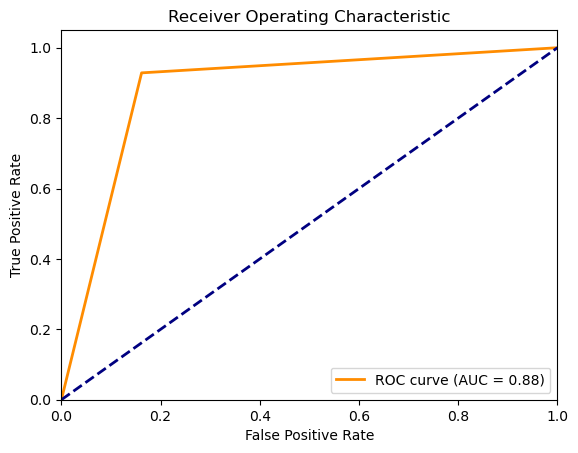

In [22]:
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Calculate the F1 score
f1 = f1_score(y_test, y_pred_knn)
print(f'F1 Score: {f1}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)  # Make sure y_pred_knn contains probabilities or scores, not just binary predictions

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_knn)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Support Vector Machines

In [24]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)  
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [25]:
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [26]:
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[685,  14],
       [ 44, 292]], dtype=int64)

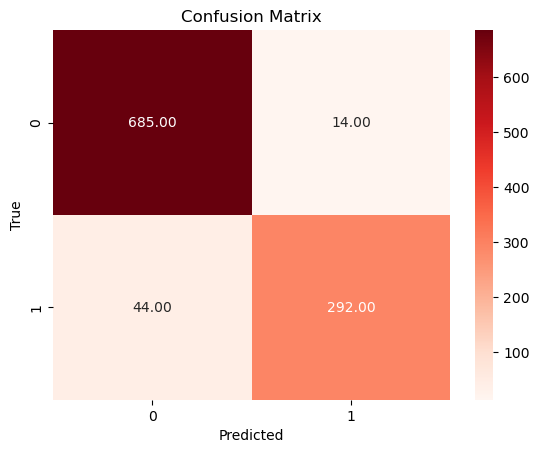

In [27]:
# Confusion matrix graph using seaborn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
#accuracy score

accuracy_score(y_test, y_pred_svc)

0.9439613526570049

In [29]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 0.954248366013072
Recall: 0.8690476190476191


F1 Score: 0.8199737187910644


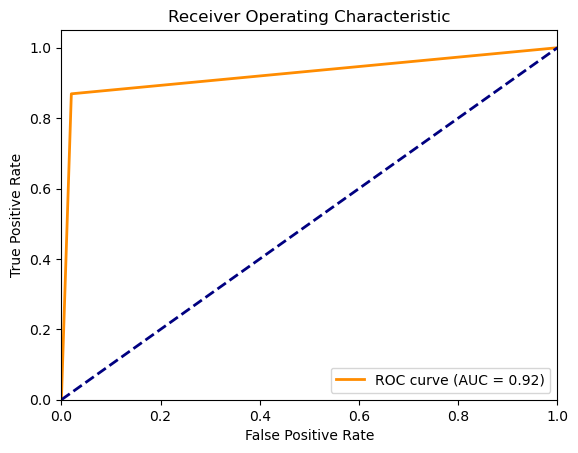

In [30]:
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Calculate the F1 score
f1 = f1_score(y_test, y_pred_knn)
print(f'F1 Score: {f1}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)  # Make sure y_pred_knn contains probabilities or scores, not just binary predictions

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_svc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()